University of Wollong (UOW)  
CSCI991 Project Spring 2019  
Team B  

<em>Peng TIAN, pt882@uowmail.edu.au</em>

# Visualize images in RxRx1


<em>This code is based on visualization.ipynb<sup>[1]</sup>. Visualization.ipynb uses <strong>TPU</strong> via <strong>google colab</strong> whereas this code uses local <strong>GPU</strong>.  

The aim of this code is to ensure that <a href='https://github.com/recursionpharma/rxrx1-utils'>rxrx1-utils</a> can perform in <a href='000_development_environment_on_local_machine.ipynb'>local development environment</a>.
</em>
  

<strong>Reference:</strong>
<ol>
    <li><a hrefd='https://colab.research.google.com/github/recursionpharma/rxrx1-utils/blob/master/notebooks/visualization.ipynb'>https://colab.research.google.com/github/recursionpharma/rxrx1-utils/blob/master/notebooks/visualization.ipynb</a>
</ol>


In [1]:
import sys
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import rxrx.io as rio

C:\Users\Peng\Anaconda3\envs\tensorflow_gpuenv 1.13.1\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Peng\Anaconda3\envs\tensorflow_gpuenv 1.13.1\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Peng\Anaconda3\envs\tensorflow_gpuenv 1.13.1\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Peng\Anaco

In [3]:
# Ref:
#     rxrx/io.py, line: 14, 15

LOCAL_IMAGES_BASE_PATH = 'D:\\_peng\\recursion-cellular-image-classification'  # windows
DEFAULT_METADATA_BASE_PATH = LOCAL_IMAGES_BASE_PATH

In [4]:
# train set, experiment RPE-05, plate 3, well D19, site 2

t = rio.load_site('train', 'RPE-05', 3, 'D19', 2, base_path=LOCAL_IMAGES_BASE_PATH)

t.shape

(512, 512, 6)

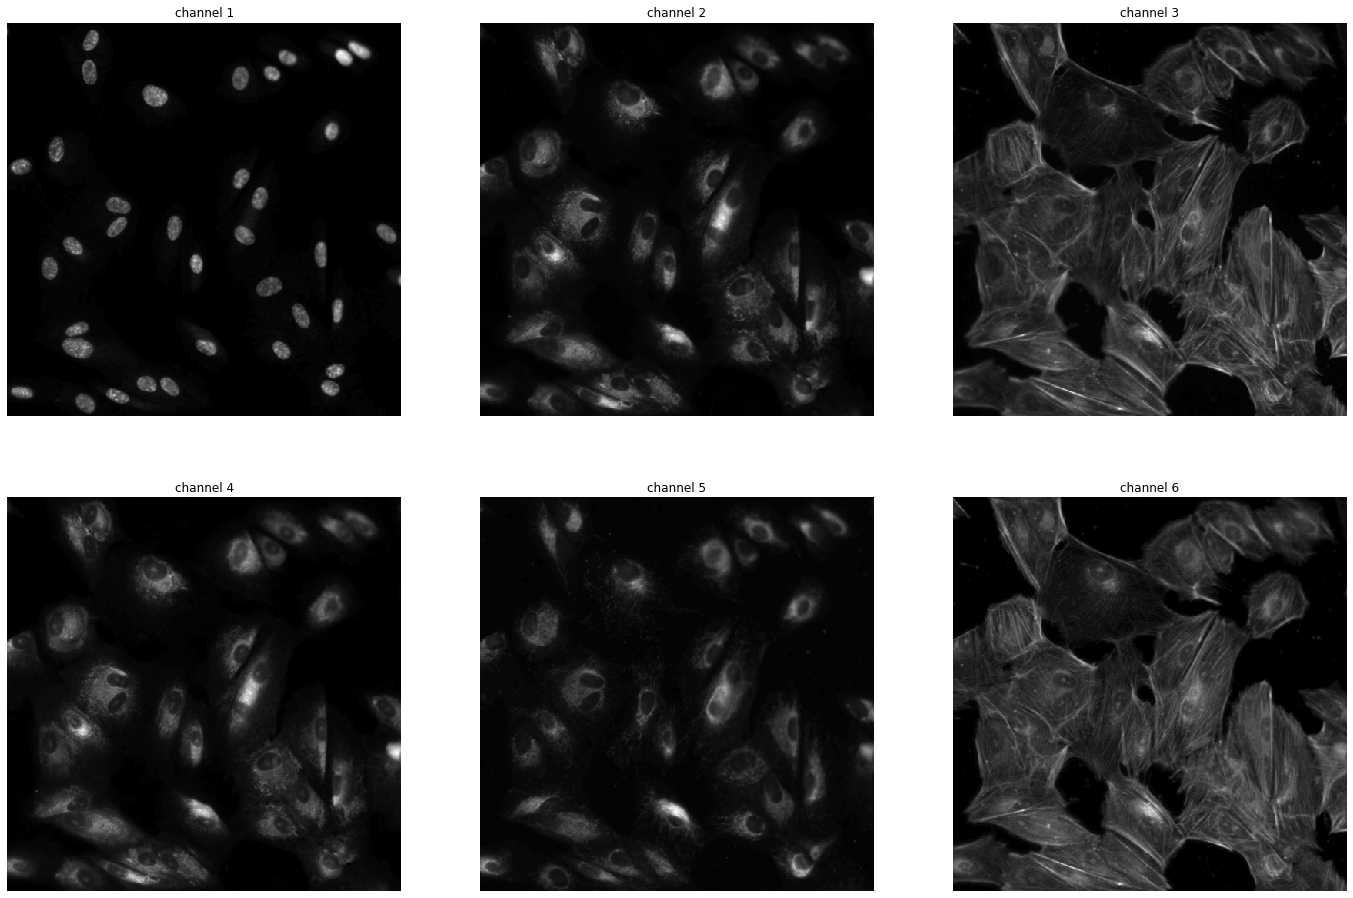

In [5]:
fig, axes = plt.subplots(2, 3, figsize=(24, 16))

for i, ax in enumerate(axes.flatten()):
    ax.axis('off')
    ax.set_title('channel {}'.format(i + 1))
    _ = ax.imshow(t[:, :, i], cmap='gray')

In [6]:
x = rio.convert_tensor_to_rgb(t)

x.shape

(512, 512, 3)

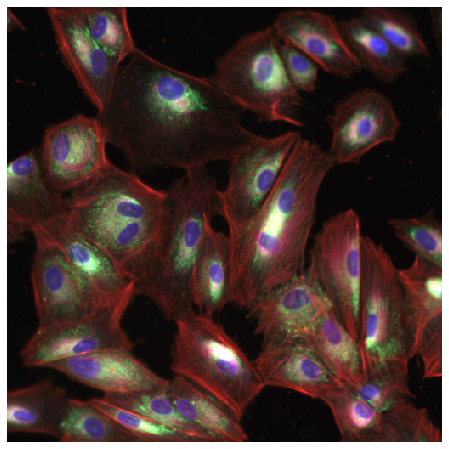

In [7]:
plt.figure(figsize=(8, 8))
plt.axis('off')

_ = plt.imshow(x)

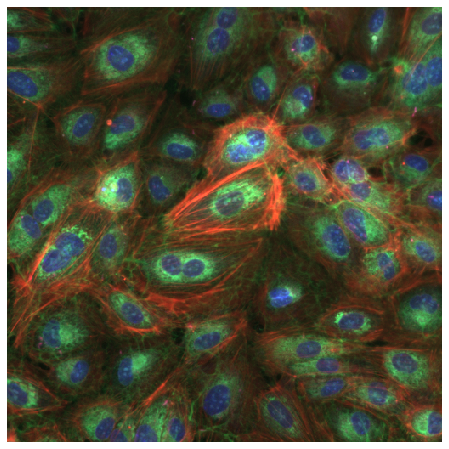

In [8]:
y = rio.load_site_as_rgb('train', 'HUVEC-08', 4, 'K09', 1, base_path=LOCAL_IMAGES_BASE_PATH)

plt.figure(figsize=(8, 8))
plt.axis('off')

_ = plt.imshow(y)

In [9]:
# train.csv, train_controls.csv, test.csv, test_controls.csv

md = rio.combine_metadata(base_path=DEFAULT_METADATA_BASE_PATH)

md.head()

,cell_type,dataset,experiment,plate,sirna,site,well,well_type
id_code,,,,,,,,
HEPG2-08_1_B02,HEPG2,test,HEPG2-08,1,1138.0,1,B02,negative_control
HEPG2-08_1_B02,HEPG2,test,HEPG2-08,1,1138.0,2,B02,negative_control
HEPG2-08_1_B03,HEPG2,test,HEPG2-08,1,NaN,1,B03,treatment
HEPG2-08_1_B03,HEPG2,test,HEPG2-08,1,NaN,2,B03,treatment
HEPG2-08_1_B04,HEPG2,test,HEPG2-08,1,NaN,1,B04,treatment
